In [561]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import numpy as np

In [562]:
def boxplot(data):
    plt.figure(figsize=(20, 2))
    sns.boxplot(data=data, orient="h")
    plt.title(data.name)
    plt.xlabel('Cantidad de accesos')
    plt.show()

In [652]:
df_velocidad = pd.read_csv('./Internet_Accesos-por-velocidad.csv',delimiter=',')
df_velocidad.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,Unnamed: 11
0,2022,3,33.013,96.727,1.161.370,1.151.906,823.505,479.822,6.995.750,349.035,11.091.128,NaN
1,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684,NaN
2,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009,NaN
3,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794,NaN
4,2021,3,40.174,41.437,2.550.229,1.095.772,710.122,536.364,4.948.174,163.269,10.085.541,NaN


In [653]:
df_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      35 non-null     int64  
 1   Trimestre                35 non-null     int64  
 2   Hasta 512 kbps           35 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  35 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    35 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   35 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  35 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  35 non-null     object 
 8   Más de 30 Mbps           35 non-null     object 
 9   OTROS                    35 non-null     float64
 10  Total                    35 non-null     object 
 11  Unnamed: 11              0 non-null      float64
dtypes: float64(4), int64(2), object(6)
memory usage: 3.4+ KB


In [654]:
df_velocidad.drop(['Unnamed: 11'],axis=1,inplace=True)

In [655]:
df_velocidad[df_velocidad.columns[2:]] = df_velocidad[df_velocidad.columns[2:]].astype(str)
df_velocidad[df_velocidad.columns[2:]] = df_velocidad[df_velocidad.columns[2:]].replace('\.', '', regex=True)
df_velocidad[df_velocidad.columns[2:]] = df_velocidad[df_velocidad.columns[2:]].astype(int)
df_velocidad.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
1,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
2,2022,1,3489,10484,1263273,1209148,967508,509830,6336187,198333,10624009
3,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794
4,2021,3,40174,41437,2550229,1095772,710122,536364,4948174,163269,10085541


In [656]:
df_velocidad['hasta 1Mbps'] = df_velocidad[df_velocidad.columns[2:4]].sum(axis=1)
df_velocidad['1Mbps a 10Mbps'] = df_velocidad[df_velocidad.columns[4:6]].sum(axis=1)
df_velocidad.drop(df_velocidad.columns[2:6],axis=1,inplace=True)

In [657]:
df_velocidad.head()

,Año,Trimestre,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,hasta 1Mbps,1Mbps a 10Mbps
0,2022,3,823505,479822,6995750,349035,11091128,129740,2313276
1,2022,2,856562,485321,6741922,351594,10958684,133165,2390120
2,2022,1,967508,509830,6336187,198333,10624009,13973,2472421
3,2021,4,976539,558358,6032322,194251,10489794,69783,2658541
4,2021,3,710122,536364,4948174,163269,10085541,81611,3646001


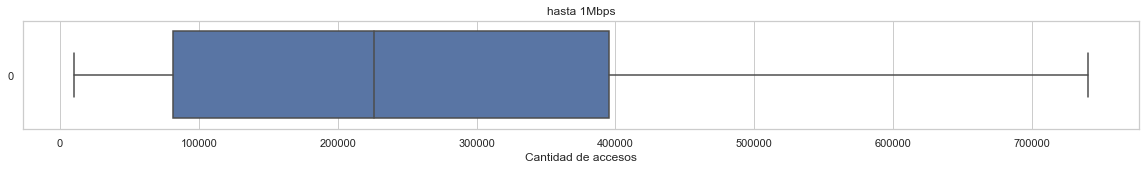

In [658]:
boxplot(df_velocidad['hasta 1Mbps'])

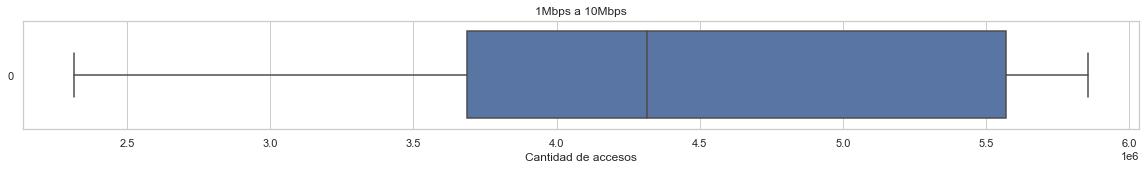

In [659]:
boxplot(df_velocidad['1Mbps a 10Mbps'])

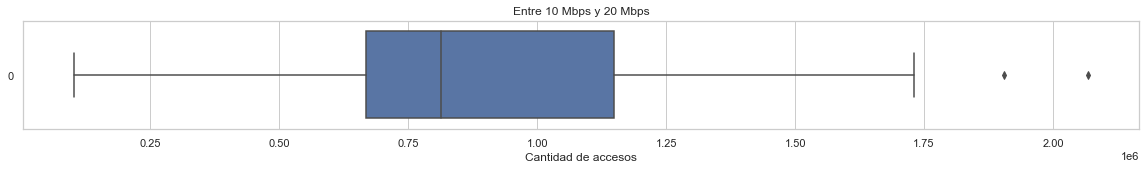

In [660]:
boxplot(df_velocidad['Entre 10 Mbps y 20 Mbps'])

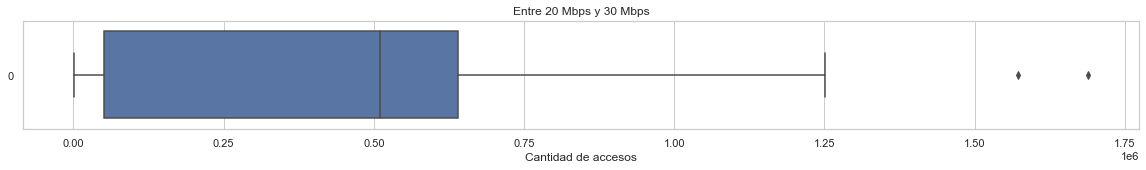

In [661]:
boxplot(df_velocidad['Entre 20 Mbps y 30 Mbps'])

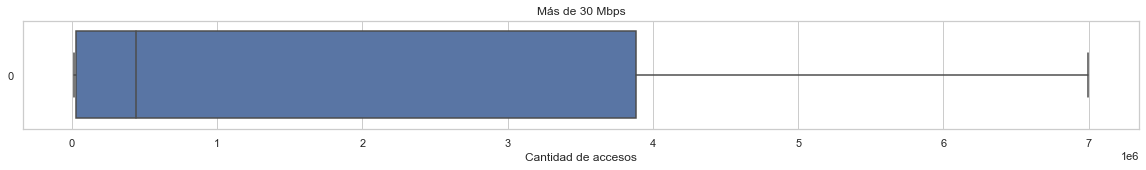

In [662]:
boxplot(df_velocidad['Más de 30 Mbps'])

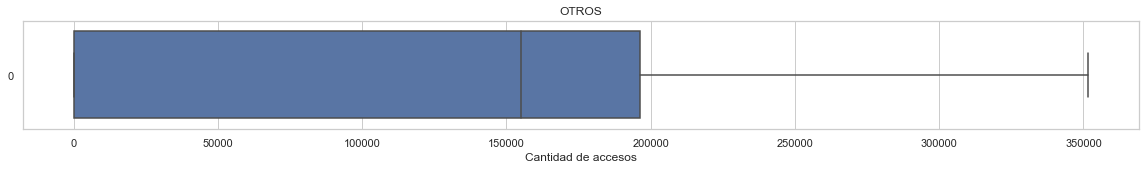

In [663]:
boxplot(df_velocidad['OTROS'])

Las columnas no muestras valores atipicos demaciados alejados por lo que se puede trabajar con ellos.

In [664]:
df_velocidad['Periodo'] = df_velocidad['Año'].astype(str) + '-Q' + df_velocidad['Trimestre'].astype(str)
df_velocidad.drop(['Año', 'Trimestre'],axis=1,inplace=True)
df_velocidad = df_velocidad.sort_values(by='Periodo')
df_velocidad.head()

,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,hasta 1Mbps,1Mbps a 10Mbps,Periodo
34,101127,345,11595,0,6272846,740303,5419476,2014-Q1
33,147273,478,12259,0,6348745,697472,5491263,2014-Q2
32,182483,507,12424,0,6367671,611761,5526809,2014-Q3
31,276254,4371,15229,0,6475485,598824,5580807,2014-Q4
30,348102,7643,16347,0,6623212,558077,5693043,2015-Q1


In [665]:
df_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 34 to 0
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Entre 10 Mbps y 20 Mbps  35 non-null     int32 
 1   Entre 20 Mbps y 30 Mbps  35 non-null     int32 
 2   Más de 30 Mbps           35 non-null     int32 
 3   OTROS                    35 non-null     int32 
 4   Total                    35 non-null     int32 
 5   hasta 1Mbps              35 non-null     int64 
 6   1Mbps a 10Mbps           35 non-null     int64 
 7   Periodo                  35 non-null     object
dtypes: int32(5), int64(2), object(1)
memory usage: 1.8+ KB


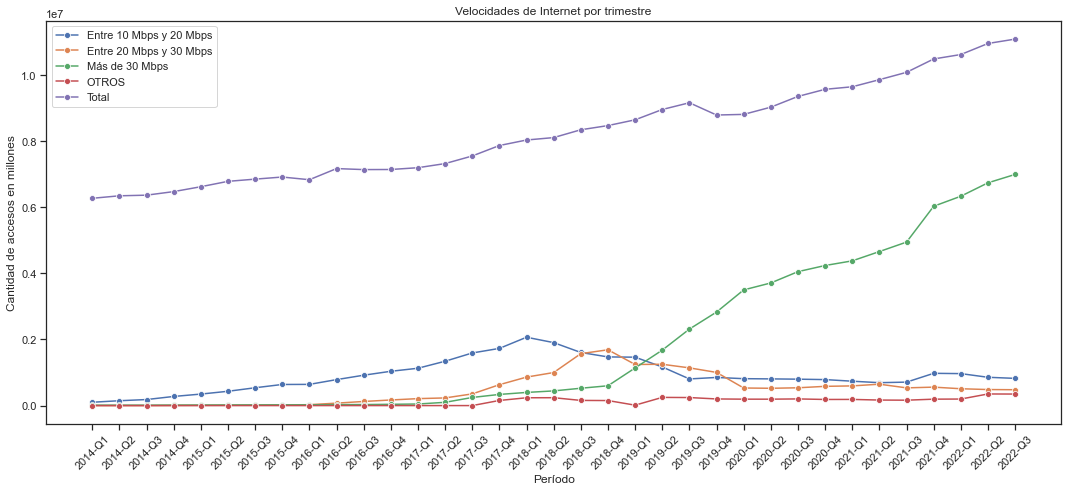

In [666]:
sns.set(style='ticks')
plt.figure(figsize=(15, 7))
for column in df_velocidad.columns[:5]:
    sns.lineplot(data=df_velocidad, x='Periodo', y=column, label=column, marker='o')
plt.title('Velocidades de Internet por trimestre')
plt.xlabel('Período')
plt.ylabel('Cantidad de accesos en millones')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Se observa que a nivel nacional la cantidad de accesos a velocidades mayores a 30Mb crece mientras que en el caso de velocidades menores la tendencia es bajista, esta tendencia se corresponde con la evolucion de las tecnologias de conexion a internet ya que con la implementacion de nuevas tecnologias las velocidades crecen y al mismo tiempo la demanda aumenta segun los precios por el servicio disminuyen.

In [667]:
df_velocidad = df_velocidad.sort_values('Periodo').reset_index()
df_velocidad.tail()

,index,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,hasta 1Mbps,1Mbps a 10Mbps,Periodo
30,4,710122,536364,4948174,163269,10085541,81611,3646001,2021-Q3
31,3,976539,558358,6032322,194251,10489794,69783,2658541,2021-Q4
32,2,967508,509830,6336187,198333,10624009,13973,2472421,2022-Q1
33,1,856562,485321,6741922,351594,10958684,133165,2390120,2022-Q2
34,0,823505,479822,6995750,349035,11091128,129740,2313276,2022-Q3


In [668]:
df_velocidad = df_velocidad.drop('index',axis=1)

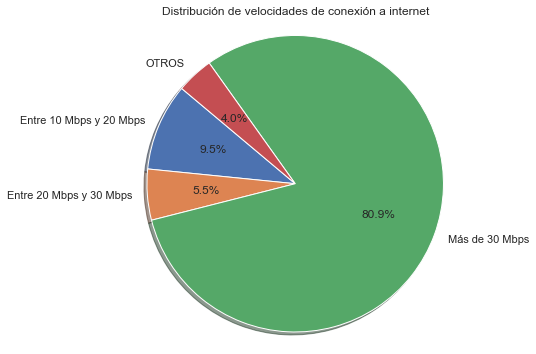

In [669]:
data = df_velocidad.iloc[-1]

# Extraemos las etiquetas y los valores para el gráfico de torta
etiquetas = ["Entre 10 Mbps y 20 Mbps", "Entre 20 Mbps y 30 Mbps", "Más de 30 Mbps", "OTROS"]
valores = data[["Entre 10 Mbps y 20 Mbps", "Entre 20 Mbps y 30 Mbps", "Más de 30 Mbps", "OTROS"]]

# Creamos el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Distribución de velocidades de conexión a internet")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Tomando los ultimos datos de los accesos por velocidad de conexion se demuestra que las velocidad mayores a 30mbps tiene una dominacia del 81%

In [672]:
df_velocidad.head()

,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,hasta 1Mbps,1Mbps a 10Mbps,Periodo
0,101127,345,11595,0,6272846,740303,5419476,2014-Q1
1,147273,478,12259,0,6348745,697472,5491263,2014-Q2
2,182483,507,12424,0,6367671,611761,5526809,2014-Q3
3,276254,4371,15229,0,6475485,598824,5580807,2014-Q4
4,348102,7643,16347,0,6623212,558077,5693043,2015-Q1


In [673]:
df_velocidad.to_csv('./Data_powerbi/velocidad.csv')

***

In [615]:
df_tecnologia = pd.read_csv('./Internet_Accesos-por-tecnologia.csv')
df_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021


In [616]:
df_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     object 
 3   Cablemodem    35 non-null     object 
 4   Fibra óptica  35 non-null     object 
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.6+ KB


In [617]:
df_tecnologia[df_tecnologia.columns[5:7]] = df_tecnologia[df_tecnologia.columns[5:7]] * 1000
df_tecnologia[df_tecnologia.columns[5:7]] = df_tecnologia[df_tecnologia.columns[5:7]].astype(int)
df_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557110,235230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556243,231609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545814,251996,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523107,252596,10.489.794,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,1.566.048,492415,250190,10.085.541,Jul-Sept 2021


In [618]:
df_tecnologia[df_tecnologia.columns[2:8]] = df_tecnologia[df_tecnologia.columns[2:8]].astype(str)
df_tecnologia[df_tecnologia.columns[2:8]] = df_tecnologia[df_tecnologia.columns[2:8]].replace('\.', '', regex=True)
df_tecnologia[df_tecnologia.columns[2:8]] = df_tecnologia[df_tecnologia.columns[2:8]].astype(int)
df_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
1,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
2,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
3,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021
4,2021,3,1950631,5826257,1566048,492415,250190,10085541,Jul-Sept 2021


In [619]:
df_tecnologia['Periodo'] = df_tecnologia['Año'].astype(str) + '-Q' + df_tecnologia['Trimestre'].astype(str)
df_tecnologia.drop(['Año', 'Trimestre'],axis=1,inplace=True)
df_tecnologia = df_tecnologia.sort_values(by='Periodo')
df_tecnologia.head()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
34,3697066,2407330,150323,70749,72930,6398398,2014-Q1
33,3708882,2461670,149363,72405,72148,6464468,2014-Q2
32,3714764,2569868,155494,85096,70049,6595271,2014-Q3
31,3764038,2536219,149682,76984,71573,6598496,2014-Q4
30,3756153,2668248,168188,79098,66045,6737732,2015-Q1


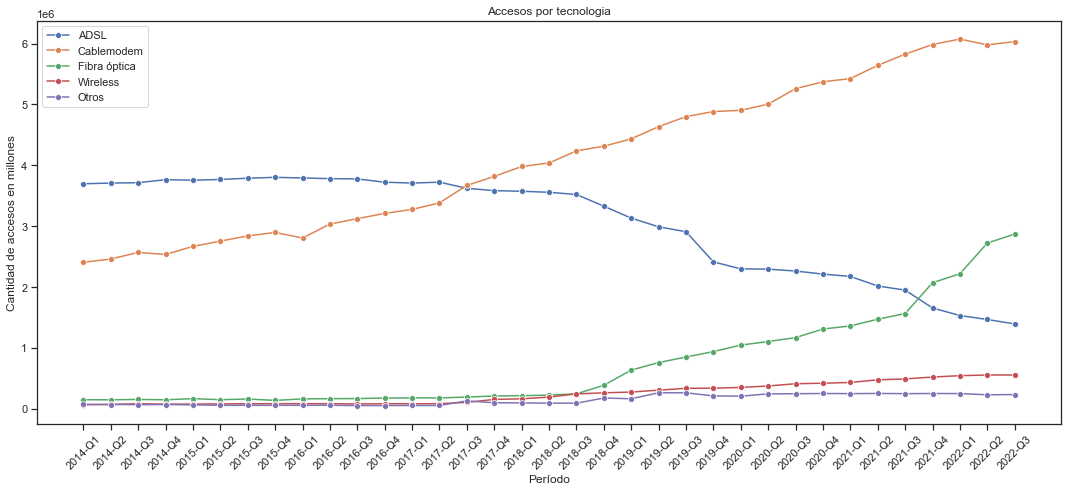

In [620]:
sns.set(style='ticks')
plt.figure(figsize=(15, 7))
for column in df_tecnologia.columns[:5]:
    sns.lineplot(data=df_tecnologia, x='Periodo', y=column, label=column, marker='o')
plt.title('Accesos por tecnologia')
plt.xlabel('Período')
plt.ylabel('Cantidad de accesos en millones')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Este grafico muestra como la tecnologia de ADLS a decrecido en accesos siendo superada por cablemodem e incluso fibra optica. En el caso de Wireles y otros han tenido una leve subida a partir del 2017.

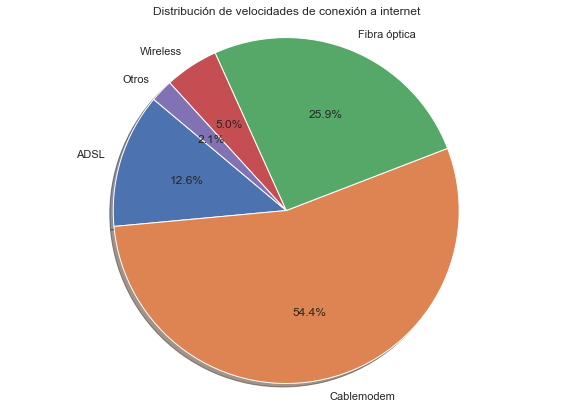

In [645]:
data = df_tecnologia.iloc[-1]

# Extraemos las etiquetas y los valores para el gráfico de torta
etiquetas = df_tecnologia.columns[:5]
valores = data[df_tecnologia.columns[:5]]

# Creamos el gráfico de torta
plt.figure(figsize=(10, 7))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Distribución de velocidades de conexión a internet")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Este grafico de porcentaje muetra la dominacia de cada tecnologia, quedandose como domiannte la tecnologia cablemodem

***

In [583]:
df_ingresos = pd.read_csv(f'./Internet_Ingresos.csv')
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021


In [584]:
df_ingresos['Periodo'] = df_ingresos['Año'].astype(str) + '-Q' + df_ingresos['Trimestre'].astype(str)
df_ingresos.drop(['Año', 'Trimestre'],axis=1,inplace=True)
df_ingresos = df_ingresos.sort_values(by='Periodo')
df_ingresos.head()

,Ingresos (miles de pesos),Periodo
34,2.984.054,2014-Q1
33,3.270.816,2014-Q2
32,3.478.638,2014-Q3
31,3.950.441,2014-Q4
30,4.876.385,2015-Q1


In [585]:
df_ingresos['Ingresos (miles de pesos)'] = df_ingresos['Ingresos (miles de pesos)'].replace('\.', '', regex=True)
df_ingresos['Ingresos (miles de pesos)'] = df_ingresos['Ingresos (miles de pesos)'].astype(int)
df_ingresos.head()

,Ingresos (miles de pesos),Periodo
34,2984054,2014-Q1
33,3270816,2014-Q2
32,3478638,2014-Q3
31,3950441,2014-Q4
30,4876385,2015-Q1


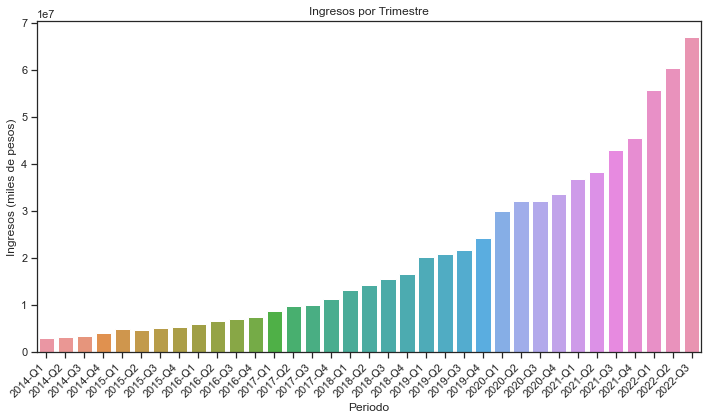

In [586]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Periodo', y='Ingresos (miles de pesos)', data=df_ingresos)
plt.xticks(rotation=45, ha='right')
plt.title('Ingresos por Trimestre')
plt.xlabel('Periodo')
plt.ylabel('Ingresos (miles de pesos)')
plt.tight_layout()
plt.show()

Este grafico demuestras que proveer de acceso a internet es una actividad muy rentable y se podria adjudicar a la globalizacion y a la necesidad de mayores velocidades ya que no solo aumenta la demanda sino que tambien la magnitud de la informacion que se sube y se baja de la internet.

In [587]:
# Crea una columna con la diferencia de ingresos por trimestre y otra con el porcentaje de crecimiento que se tuvo por trimestre
df_ingresos['Diferencia'] = df_ingresos['Ingresos (miles de pesos)'].diff()
df_ingresos['Porcentaje_Crecimiento'] = round(df_ingresos['Diferencia'] / df_ingresos['Ingresos (miles de pesos)'].shift() * 100,2)

In [674]:
df_ingresos.head()

,Ingresos (miles de pesos),Periodo,Diferencia,Porcentaje_Crecimiento
34,2984054,2014-Q1,NaN,NaN
33,3270816,2014-Q2,286762.0,9.61
32,3478638,2014-Q3,207822.0,6.35
31,3950441,2014-Q4,471803.0,13.56
30,4876385,2015-Q1,925944.0,23.44


Segun los nuevos datos se observa que en el año 2015 entre Abr-Jun se produjo un decrecimiento del 3.58 y luego en el 2020 entre Jul-Sept de 0.33%.

In [589]:
print('Promedio total : ',df_ingresos['Porcentaje_Crecimiento'].mean())

Promedio total :  9.763235294117647


Como dato extra el promedio de crecimiento entre el año 2014 y 2022 fue del 9.47 % por trimestre

In [675]:
df_ingresos.to_csv('./Data_powerbi/ingresos.csv')

***

In [590]:
df_accesos = pd.read_csv(f'./Internet_Penetracion.csv')
df_accesos.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,"76,64","23,95",Jul-Sept 2022
1,2022,2,"75,97","23,72",Abr-Jun 2022
2,2022,1,"73,88","23,05",Ene-Mar 2022
3,2021,4,"73,18","22,81",Oct-Dic 2021
4,2021,3,"70,58","21,98",Jul-Sept 2021


In [591]:
df_accesos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           35 non-null     int64 
 1   Trimestre                     35 non-null     int64 
 2   Accesos por cada 100 hogares  35 non-null     object
 3   Accesos por cada 100 hab      35 non-null     object
 4   Periodo                       35 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [592]:
df_accesos = df_accesos.groupby(['Año', 'Trimestre']).sum().reset_index()
df_accesos['Periodo'] = df_accesos['Año'].astype(str) + '-Q' + df_accesos['Trimestre'].astype(str)
df_accesos = df_accesos.sort_values(by='Periodo')
df_accesos.drop(['Año','Trimestre'],inplace=True,axis=1)
df_accesos.head()

,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,"49,55","15,05",2014-Q1
1,"49,86","15,16",2014-Q2
2,"50,67","15,43",2014-Q3
3,"50,5","15,39",2014-Q4
4,"51,36","15,68",2015-Q1


In [593]:
df_accesos[df_accesos.columns[:2]] = df_accesos[df_accesos.columns[:2]].replace('\,', '.', regex=True)
df_accesos[df_accesos.columns[:2]] = df_accesos[df_accesos.columns[:2]].astype(float)
df_accesos.head()

,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,49.55,15.05,2014-Q1
1,49.86,15.16,2014-Q2
2,50.67,15.43,2014-Q3
3,50.50,15.39,2014-Q4
4,51.36,15.68,2015-Q1


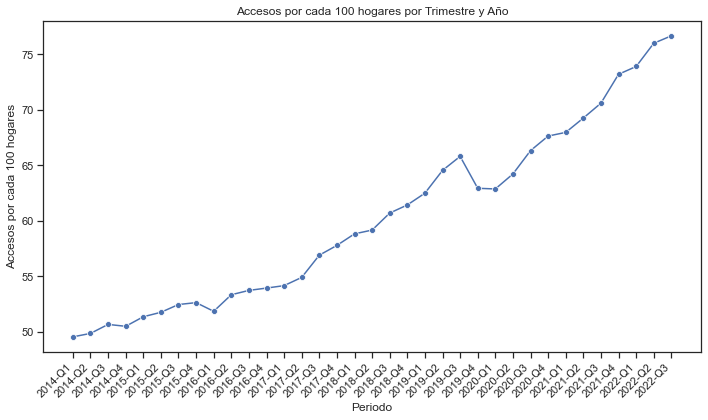

In [594]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Periodo', y='Accesos por cada 100 hogares', data=df_accesos, marker='o')
plt.xticks(rotation=45, ha='right')
plt.title('Accesos por cada 100 hogares por Trimestre y Año')
plt.xlabel('Periodo')
plt.ylabel('Accesos por cada 100 hogares')
plt.tight_layout()
plt.show()

***

In [595]:
df_telefonia_accesos = pd.read_csv('./telefonia_fija.csv',delimiter=',')
df_telefonia_accesos.head()

,Año,Trimestre,Accesos telefonía fija (total),Accesos telefonía fija (hogares),Accesos telefonía fija (comercial),Accesos telefonía fija (gobierno),Accesos telefonía fija (otros),Periodo
0,2014,1,9.562.231,7.897.980,1.065.834,30.917,567.500,Ene-Mar 2014
1,2014,2,9.548.994,7.872.511,1.073.038,31.339,572.106,Abr-Jun 2014
2,2014,3,9.613.361,7.924.613,1.091.747,32.516,564.485,Jul-Sept 2014
3,2014,4,9.689.752,7.989.623,1.106.502,33.139,560.488,Oct-Dic 2014
4,2015,1,10.086.221,8.358.053,1.134.427,36.888,556.853,Ene-Mar 2015


In [596]:
df_telefonia_accesos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Año                                 36 non-null     int64  
 1   Trimestre                           36 non-null     int64  
 2   Accesos telefonía fija (total)      36 non-null     object 
 3   Accesos telefonía fija (hogares)    36 non-null     object 
 4   Accesos telefonía fija (comercial)  36 non-null     object 
 5   Accesos telefonía fija (gobierno)   36 non-null     float64
 6   Accesos telefonía fija (otros)      36 non-null     float64
 7   Periodo                             36 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.4+ KB


In [597]:
df_telefonia_accesos[df_telefonia_accesos.columns[5:7]] = df_telefonia_accesos[df_telefonia_accesos.columns[5:7]] * 1000
df_telefonia_accesos[df_telefonia_accesos.columns[5:7]] = df_telefonia_accesos[df_telefonia_accesos.columns[5:7]].astype(int)
df_telefonia_accesos.head()

,Año,Trimestre,Accesos telefonía fija (total),Accesos telefonía fija (hogares),Accesos telefonía fija (comercial),Accesos telefonía fija (gobierno),Accesos telefonía fija (otros),Periodo
0,2014,1,9.562.231,7.897.980,1.065.834,30917,567500,Ene-Mar 2014
1,2014,2,9.548.994,7.872.511,1.073.038,31339,572106,Abr-Jun 2014
2,2014,3,9.613.361,7.924.613,1.091.747,32516,564485,Jul-Sept 2014
3,2014,4,9.689.752,7.989.623,1.106.502,33139,560488,Oct-Dic 2014
4,2015,1,10.086.221,8.358.053,1.134.427,36888,556853,Ene-Mar 2015


In [598]:
df_telefonia_accesos[df_telefonia_accesos.columns[2:5]] = df_telefonia_accesos[df_telefonia_accesos.columns[2:5]].replace('\.', '', regex=True)
df_telefonia_accesos[df_telefonia_accesos.columns[2:5]] = df_telefonia_accesos[df_telefonia_accesos.columns[2:5]].astype(int)
df_telefonia_accesos.head()

,Año,Trimestre,Accesos telefonía fija (total),Accesos telefonía fija (hogares),Accesos telefonía fija (comercial),Accesos telefonía fija (gobierno),Accesos telefonía fija (otros),Periodo
0,2014,1,9562231,7897980,1065834,30917,567500,Ene-Mar 2014
1,2014,2,9548994,7872511,1073038,31339,572106,Abr-Jun 2014
2,2014,3,9613361,7924613,1091747,32516,564485,Jul-Sept 2014
3,2014,4,9689752,7989623,1106502,33139,560488,Oct-Dic 2014
4,2015,1,10086221,8358053,1134427,36888,556853,Ene-Mar 2015


In [599]:
df_telefonia_accesos = df_telefonia_accesos.groupby(['Año', 'Trimestre']).sum().reset_index()
df_telefonia_accesos['Periodo'] = df_telefonia_accesos['Año'].astype(str) + '-Q' + df_telefonia_accesos['Trimestre'].astype(str)
df_telefonia_accesos = df_telefonia_accesos.sort_values(by='Periodo')
df_telefonia_accesos.drop(['Año','Trimestre'],inplace=True,axis=1)
df_telefonia_accesos.head()

C:\Users\Guille\AppData\Local\Temp\ipykernel_7316\1303596775.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_telefonia_accesos = df_telefonia_accesos.groupby(['Año', 'Trimestre']).sum().reset_index()


,Accesos telefonía fija (total),Accesos telefonía fija (hogares),Accesos telefonía fija (comercial),Accesos telefonía fija (gobierno),Accesos telefonía fija (otros),Periodo
0,9562231,7897980,1065834,30917,567500,2014-Q1
1,9548994,7872511,1073038,31339,572106,2014-Q2
2,9613361,7924613,1091747,32516,564485,2014-Q3
3,9689752,7989623,1106502,33139,560488,2014-Q4
4,10086221,8358053,1134427,36888,556853,2015-Q1


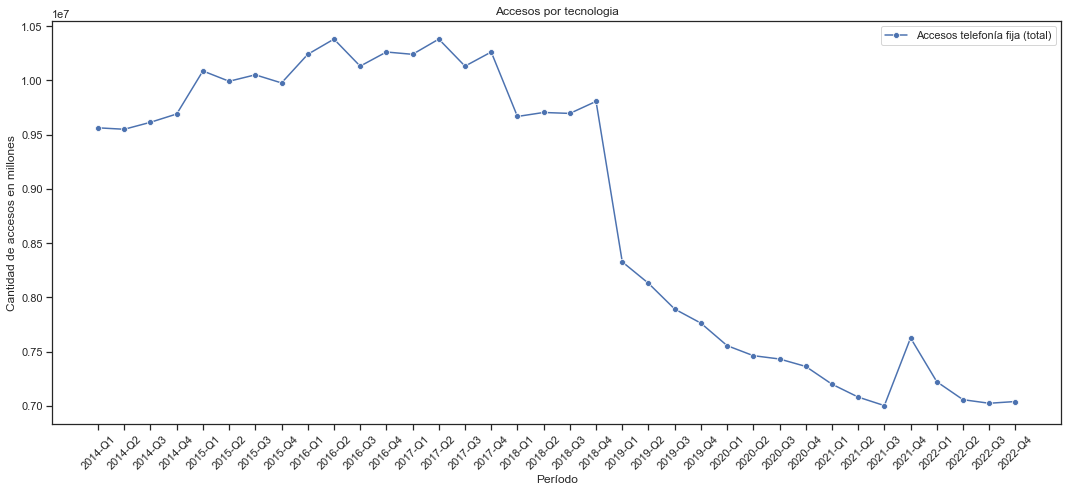

In [683]:
sns.set(style='ticks')
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_telefonia_accesos, x='Periodo', y='Accesos telefonía fija (total)', label='Accesos telefonía fija (total)', marker='o')
plt.title('Accesos por tecnologia')
plt.xlabel('Período')
plt.ylabel('Cantidad de accesos en millones')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Este grafico demuestra que los accesos a telefonia fija estan disminuyendo, se podria explicar esto por la popularidad que estan teniendo los celulares los cuales tiene ventajas significativas con respecto a los telefonos fijos.

***

In [601]:
df_Television_accesos = pd.read_csv('./Television.csv',delimiter=',')

In [602]:
df_Television_accesos.head()

,Año,Trimestre,Accesos TV por suscripción,Accesos TV satelital,Periodo
0,2022,3,7.665.931,2.064.699,Jul-Sept 2022
1,2022,2,7.647.584,2.064.637,Abr-Jun 2022
2,2022,1,7.564.827,2.049.628,Ene-Mar 2022
3,2021,4,7.596.758,2.010.217,Oct-Dic 2021
4,2021,3,7.676.892,2.147.571,Jul-Sept 2021


In [603]:
df_Television_accesos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Año                         34 non-null     int64 
 1   Trimestre                   34 non-null     int64 
 2   Accesos TV por suscripción  34 non-null     object
 3   Accesos TV satelital        34 non-null     object
 4   Periodo                     34 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [604]:
df_Television_accesos[df_Television_accesos.columns[2:4]] = df_Television_accesos[df_Television_accesos.columns[2:4]].replace('\.', '', regex=True)
df_Television_accesos[df_Television_accesos.columns[2:4]] = df_Television_accesos[df_Television_accesos.columns[2:4]].astype(int)

In [605]:
df_Television_accesos.head()

,Año,Trimestre,Accesos TV por suscripción,Accesos TV satelital,Periodo
0,2022,3,7665931,2064699,Jul-Sept 2022
1,2022,2,7647584,2064637,Abr-Jun 2022
2,2022,1,7564827,2049628,Ene-Mar 2022
3,2021,4,7596758,2010217,Oct-Dic 2021
4,2021,3,7676892,2147571,Jul-Sept 2021


In [606]:
df_Television_accesos = df_Television_accesos.groupby(['Año', 'Trimestre']).sum().reset_index()
df_Television_accesos['Periodo'] = df_Television_accesos['Año'].astype(str) + '-Q' + df_Television_accesos['Trimestre'].astype(str)
df_Television_accesos = df_Television_accesos.sort_values(by='Periodo')
df_Television_accesos.drop(['Año','Trimestre'],inplace=True,axis=1)
df_Television_accesos = df_Television_accesos.sort_values(by='Periodo')
df_Television_accesos.head()

C:\Users\Guille\AppData\Local\Temp\ipykernel_7316\3244494592.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Television_accesos = df_Television_accesos.groupby(['Año', 'Trimestre']).sum().reset_index()


,Accesos TV por suscripción,Accesos TV satelital,Periodo
0,6438522,2546820,2014-Q2
1,6449845,2450098,2014-Q3
2,6478044,2466184,2014-Q4
3,6409504,2495326,2015-Q1
4,6460053,2582737,2015-Q2


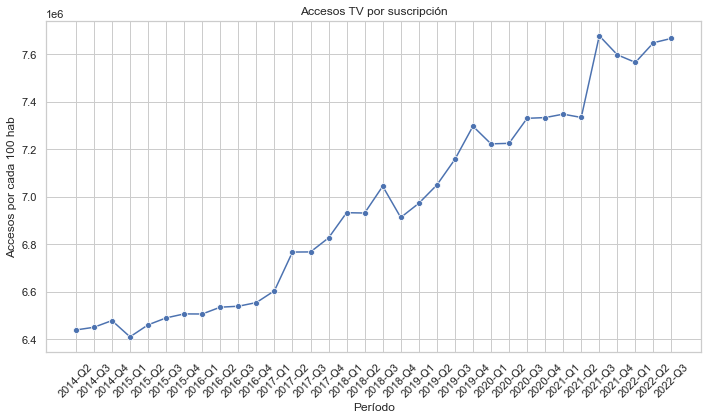

In [640]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_Television_accesos, x='Periodo', y='Accesos TV por suscripción', marker='o')
plt.title('Accesos TV por suscripción')
plt.xlabel('Período')
plt.ylabel('Accesos por cada 100 hab')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El grafico de accesos TV por suscripción muestra una tendencia alcista en la cantidad de accesos mientras que en los accesos a TV satelitar a tenido una varianza hasta el 2020 y luego una caida abrupta en los accesos.

***

La tecnología de cablemódem utiliza un tipo de cable coaxial para transmitir señales de datos de alta velocidad a través de la red de televisión por cable. Teniendo en cuenta esto se analizara el comportamiento de los accesos a tv y la conexion cablemodem.

In [636]:
df_cablemodem_tv = pd.merge(df_Television_accesos, df_tecnologia, on='Periodo')
df_cablemodem_tv.head()

,Accesos TV por suscripción,Accesos TV satelital,Periodo,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,6438522,2546820,2014-Q2,3708882,2461670,149363,72405,72148,6464468
1,6449845,2450098,2014-Q3,3714764,2569868,155494,85096,70049,6595271
2,6478044,2466184,2014-Q4,3764038,2536219,149682,76984,71573,6598496
3,6409504,2495326,2015-Q1,3756153,2668248,168188,79098,66045,6737732
4,6460053,2582737,2015-Q2,3767821,2756294,150839,82077,59157,6816188


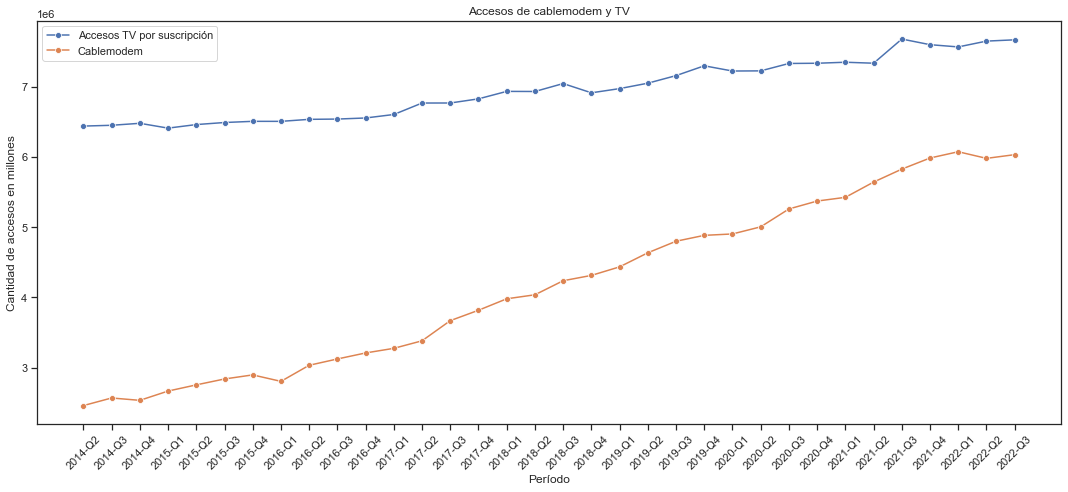

In [637]:
sns.set(style='ticks')
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_cablemodem_tv, x='Periodo', y='Accesos TV por suscripción', label='Accesos TV por suscripción', marker='o')
sns.lineplot(data=df_cablemodem_tv, x='Periodo', y='Cablemodem', label='Cablemodem', marker='o')
plt.title('Accesos de cablemodem y TV')
plt.xlabel('Período')
plt.ylabel('Cantidad de accesos en millones')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Este grafico muestra explica en parte como la tecnologia cablemodem a podido aumentar los accesos gracias a los accesos a TV ya que utilizan el mismo tipo de conexion. A nivel nacional los accesos a por cablemodem y tv en los ultimo trimestres todavia tienen una franja de espacio por lo que se deduce que 

In [639]:
df_cablemodem_tv['Porcentaje_TV_vs_Cablemodem'] = (df_cablemodem_tv['Cablemodem'] / df_cablemodem_tv['Accesos TV por suscripción']) * 100
df_cablemodem_tv.tail()

,Accesos TV por suscripción,Accesos TV satelital,Periodo,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Porcentaje_TV_vs_Cablemodem
29,7676892,2147571,2021-Q3,1950631,5826257,1566048,492415,250190,10085541,75.893434
30,7596758,2010217,2021-Q4,1657615,5984240,2072236,523107,252596,10489794,78.773603
31,7564827,2049628,2022-Q1,1533240,6073426,2219533,545814,251996,10624009,80.285061
32,7647584,2064637,2022-Q2,1468333,5979214,2723285,556243,231609,10958684,78.184352
33,7665931,2064699,2022-Q3,1395277,6031970,2871541,557110,235230,11091128,78.685420


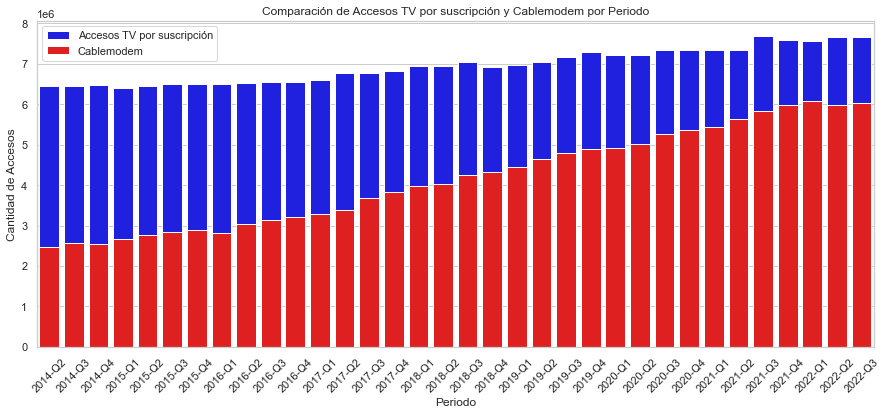

In [651]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.barplot(x="Periodo", y="Accesos TV por suscripción", data=df_cablemodem_tv, color="blue", label="Accesos TV por suscripción")
sns.barplot(x="Periodo", y="Cablemodem", data=df_cablemodem_tv, color="red", label="Cablemodem")
plt.legend(loc="upper left")
plt.xlabel("Periodo")
plt.ylabel("Cantidad de Accesos")
plt.title("Comparación de Accesos TV por suscripción y Cablemodem por Periodo")
plt.xticks(rotation=45)
plt.show()

Este grafico muestra de mejor manera el acercamiento entre accesos de cablemodem y TV

In [678]:
df_cablemodem_tv['Porcentaje_TV_vs_Cablemodem'] = df_cablemodem_tv['Porcentaje_TV_vs_Cablemodem'].round(2)

In [679]:
df_cablemodem_tv.head()

,Accesos TV por suscripción,Accesos TV satelital,Periodo,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Porcentaje_TV_vs_Cablemodem
0,6438522,2546820,2014-Q2,3708882,2461670,149363,72405,72148,6464468,38.23
1,6449845,2450098,2014-Q3,3714764,2569868,155494,85096,70049,6595271,39.84
2,6478044,2466184,2014-Q4,3764038,2536219,149682,76984,71573,6598496,39.15
3,6409504,2495326,2015-Q1,3756153,2668248,168188,79098,66045,6737732,41.63
4,6460053,2582737,2015-Q2,3767821,2756294,150839,82077,59157,6816188,42.67


In [680]:
df_cablemodem_tv.to_csv('./Data_powerbi/cablemodem_tv.csv')

***

La tecnología ADSL (Asymmetric Digital Subscriber Line) utiliza cables de cobre para proporcionar acceso a Internet de banda ancha a través de las líneas telefónicas existentes.
Se analizara el comportamiento de los accesos a telefonia fija y ADSL.

In [610]:
df_comparacion = pd.merge(df_telefonia_accesos, df_tecnologia, on='Periodo')
df_comparacion.head()

,Accesos telefonía fija (total),Accesos telefonía fija (hogares),Accesos telefonía fija (comercial),Accesos telefonía fija (gobierno),Accesos telefonía fija (otros),Periodo,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,9562231,7897980,1065834,30917,567500,2014-Q1,3697066,2407330,150323,70749,7293,6398398
1,9548994,7872511,1073038,31339,572106,2014-Q2,3708882,2461670,149363,72405,72148,6464468
2,9613361,7924613,1091747,32516,564485,2014-Q3,3714764,2569868,155494,85096,70049,6595271
3,9689752,7989623,1106502,33139,560488,2014-Q4,3764038,2536219,149682,76984,71573,6598496
4,10086221,8358053,1134427,36888,556853,2015-Q1,3756153,2668248,168188,79098,66045,6737732


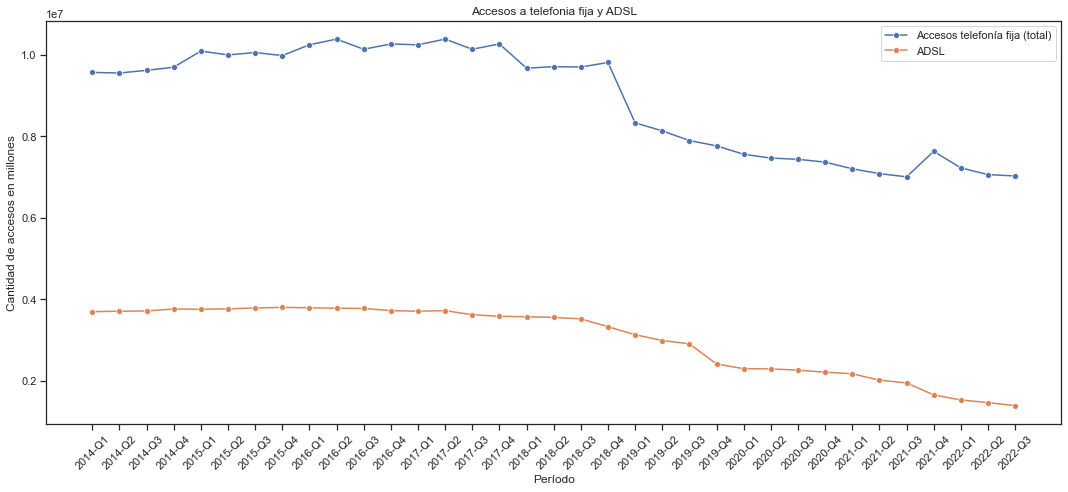

In [612]:
sns.set(style='ticks')
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_comparacion, x='Periodo', y='Accesos telefonía fija (total)', label='Accesos telefonía fija (total)', marker='o')
sns.lineplot(data=df_comparacion, x='Periodo', y='ADSL', label='ADSL', marker='o')
plt.title('Accesos a telefonia fija y ADSL')
plt.xlabel('Período')
plt.ylabel('Cantidad de accesos en millones')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Este grafico de accesos a telefonia fija y ADSL explica en parte porque estan disminuyendo los accesos a la coneccion ADSL.